# Lang preprocessing

The data is already pre-processed.

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
from pathlib import Path
import sys

sys.path.insert(1, str(Path().cwd().parent))
import common_config

In [3]:
common_config.figure_journal_basic()

In [4]:
import scanpy as sc
import matplotlib.pyplot as plt

In [ ]:
!wget -nc "https://zenodo.org/records/7537493/files/230114_hPCLS_perturbation.h5ad?download=1" -O "230114_hPCLS_perturbation.h5ad"

In [6]:
adata = sc.read_h5ad("230114_hPCLS_perturbation.h5ad")

In [7]:
adata

AnnData object with n_obs × n_vars = 63581 × 17343
    obs: 'condition', 'modality', 'patient', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'leiden_1', 'leiden_2', 'cell_type', 'cell_type_group', 'sample'
    var: 'n_cells', 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'QC_group_colors', 'cell_type_colors', 'cell_type_group_colors', 'condition_colors', 'dendrogram_cell_type', 'hvg', 'identifier_colors', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'modality_colors', 'name_colors', 'neighbors', 'patient_colors', 'pca', 'rank_genes_groups', 'sample_colors', 'timepoint_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'unsouped_counts'
    obsp: 'connectivities', 'distances'

In [8]:
adata.obs

condition modality patient treatment  \
muc31175_AAACCCAAGATCCCGC  Fibrotic Cocktail     PCLS       2        FC   
muc31175_AAACCCAAGTAAAGCT  Fibrotic Cocktail     PCLS       2        FC   
muc31175_AAACCCACAAGTTGGG  Fibrotic Cocktail     PCLS       2        FC   
muc31175_AAACCCACACCAAAGG  Fibrotic Cocktail     PCLS       2        FC   
muc31175_AAACCCACACCTCGTT  Fibrotic Cocktail     PCLS       2        FC   
...                                      ...      ...     ...       ...   
muc24279_TTTGATCGTTAGTCGT  Fibrotic Cocktail     PCLS       1        FC   
muc24279_TTTGATCGTTCCCACT  Fibrotic Cocktail     PCLS       1        FC   
muc24279_TTTGGAGCACGATAGG  Fibrotic Cocktail     PCLS       1        FC   
muc24279_TTTGTTGCAAGACAAT  Fibrotic Cocktail     PCLS       1        FC   
muc24279_TTTGTTGTCGATACGT  Fibrotic Cocktail     PCLS       1        FC   

                          identifier  n_counts  n_genes  percent_mito  \
muc31175_AAACCCAAGATCCCGC   muc31175     735.0      481      0.073469   
muc31175_AAACCCAAGTAAAGCT   muc31175    4782.0     2074      0.035968   
muc31175_AAACCCACAAGTTGGG   muc31175    1304.0      773      0.007669   
muc31175_AAACCCACACCAAAGG   muc31175    1986.0     1118      0.043807   
muc31175_AAACCCACACCTCGTT   muc31175    2049.0      986      0.060517   
...                              ...       ...      ...           ...   
muc24279_TTTGATCGTTAGTCGT   muc24279   10589.0     3476      0.014166   
muc24279_TTTGATCGTTCCCACT   muc24279     658.0      438      0.004559   
muc24279_TTTGGAGCACGATAGG   muc24279    5930.0     2419      0.037605   
muc24279_TTTGTTGCAAGACAAT   muc24279    2786.0     1487      0.045226   
muc24279_TTTGTTGTCGATACGT   muc24279    9054.0     3493      0.071571   

                          QC_group  doublet_scores  size_factors leiden_1  \
muc31175_AAACCCAAGATCCCGC      low        0.051087      0.101679        0   
muc31175_AAACCCAAGTAAAGCT      low        0.020891      0.772610        4   
muc31175_AAACCCACAAGTTGGG      low        0.027234      0.188760        1   
muc31175_AAACCCACACCAAAGG      low        0.164641      0.300193        1   
muc31175_AAACCCACACCTCGTT      low        0.138672      0.283763       21   
...                            ...             ...           ...      ...   
muc24279_TTTGATCGTTAGTCGT   medium        0.050000      1.779824        2   
muc24279_TTTGATCGTTCCCACT   medium        0.047490      0.107031       17   
muc24279_TTTGGAGCACGATAGG   medium        0.038509      0.972865       15   
muc24279_TTTGTTGCAAGACAAT   medium        0.042802      0.472818       19   
muc24279_TTTGTTGTCGATACGT   medium        0.036496      1.735684        4   

                          leiden_2     cell_type cell_type_group sample  
muc31175_AAACCCAAGATCCCGC        7       T cells         T cells   FC_2  
muc31175_AAACCCAAGTAAAGCT        2    ectopic EC     vascular EC   FC_2  
muc31175_AAACCCACAAGTTGGG        0    Mast cells      Mast cells   FC_2  
muc31175_AAACCCACACCAAAGG        0    Mast cells      Mast cells   FC_2  
muc31175_AAACCCACACCTCGTT       33       B cells         B cells   FC_2  
...                            ...           ...             ...    ...  
muc24279_TTTGATCGTTAGTCGT        5  capillary EC    capillary EC   FC_1  
muc24279_TTTGATCGTTCCCACT       18   Fibroblasts     Fibroblasts   FC_1  
muc24279_TTTGGAGCACGATAGG       14     Pericytes   SMC/Pericytes   FC_1  
muc24279_TTTGTTGCAAGACAAT       20    Mast cells      Mast cells   FC_1  
muc24279_TTTGTTGTCGATACGT        2    ectopic EC     vascular EC   FC_1  

[63581 rows x 16 columns]

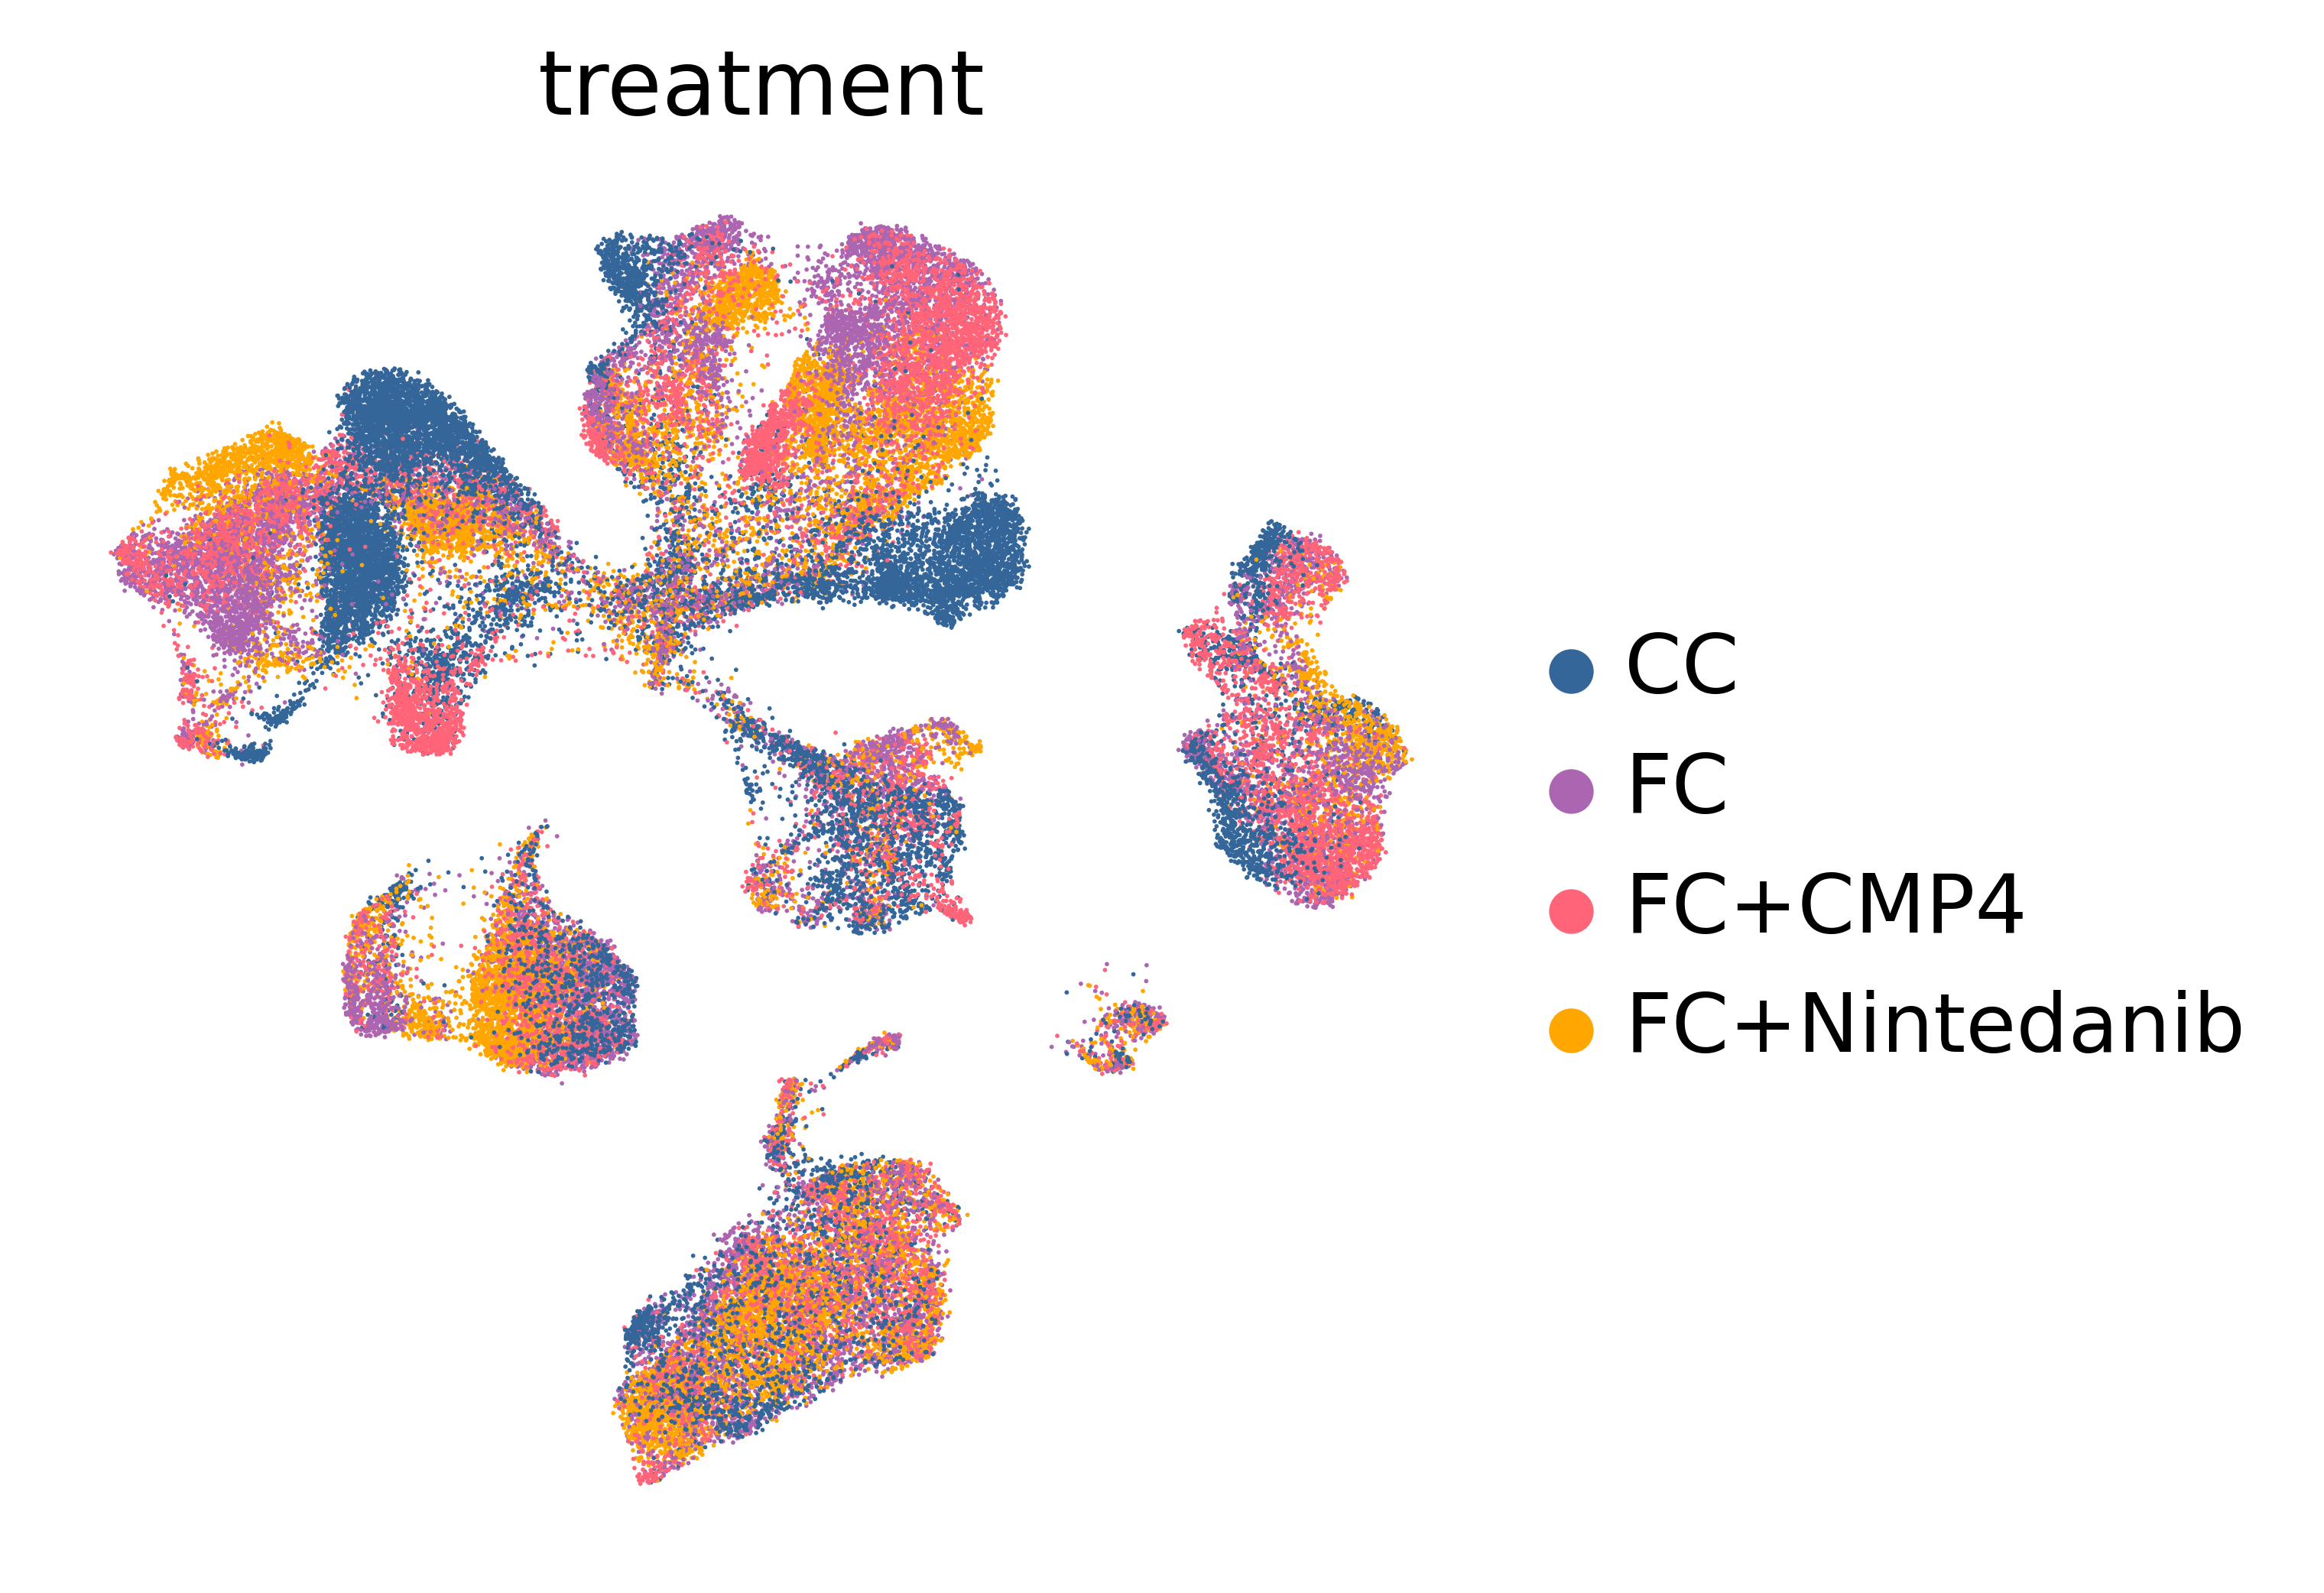

In [9]:
sc.pl.umap(
    adata,
    color="treatment",
    palette={
        "CC": common_config.pt_blue,
        "FC": "#ac65b1",
        "FC+CMP4": "#ff6478",
        "FC+Nintedanib": "#ffa600",
    },
    show=False,
)
plt.savefig("figures/treatment_umap.png", bbox_inches="tight")

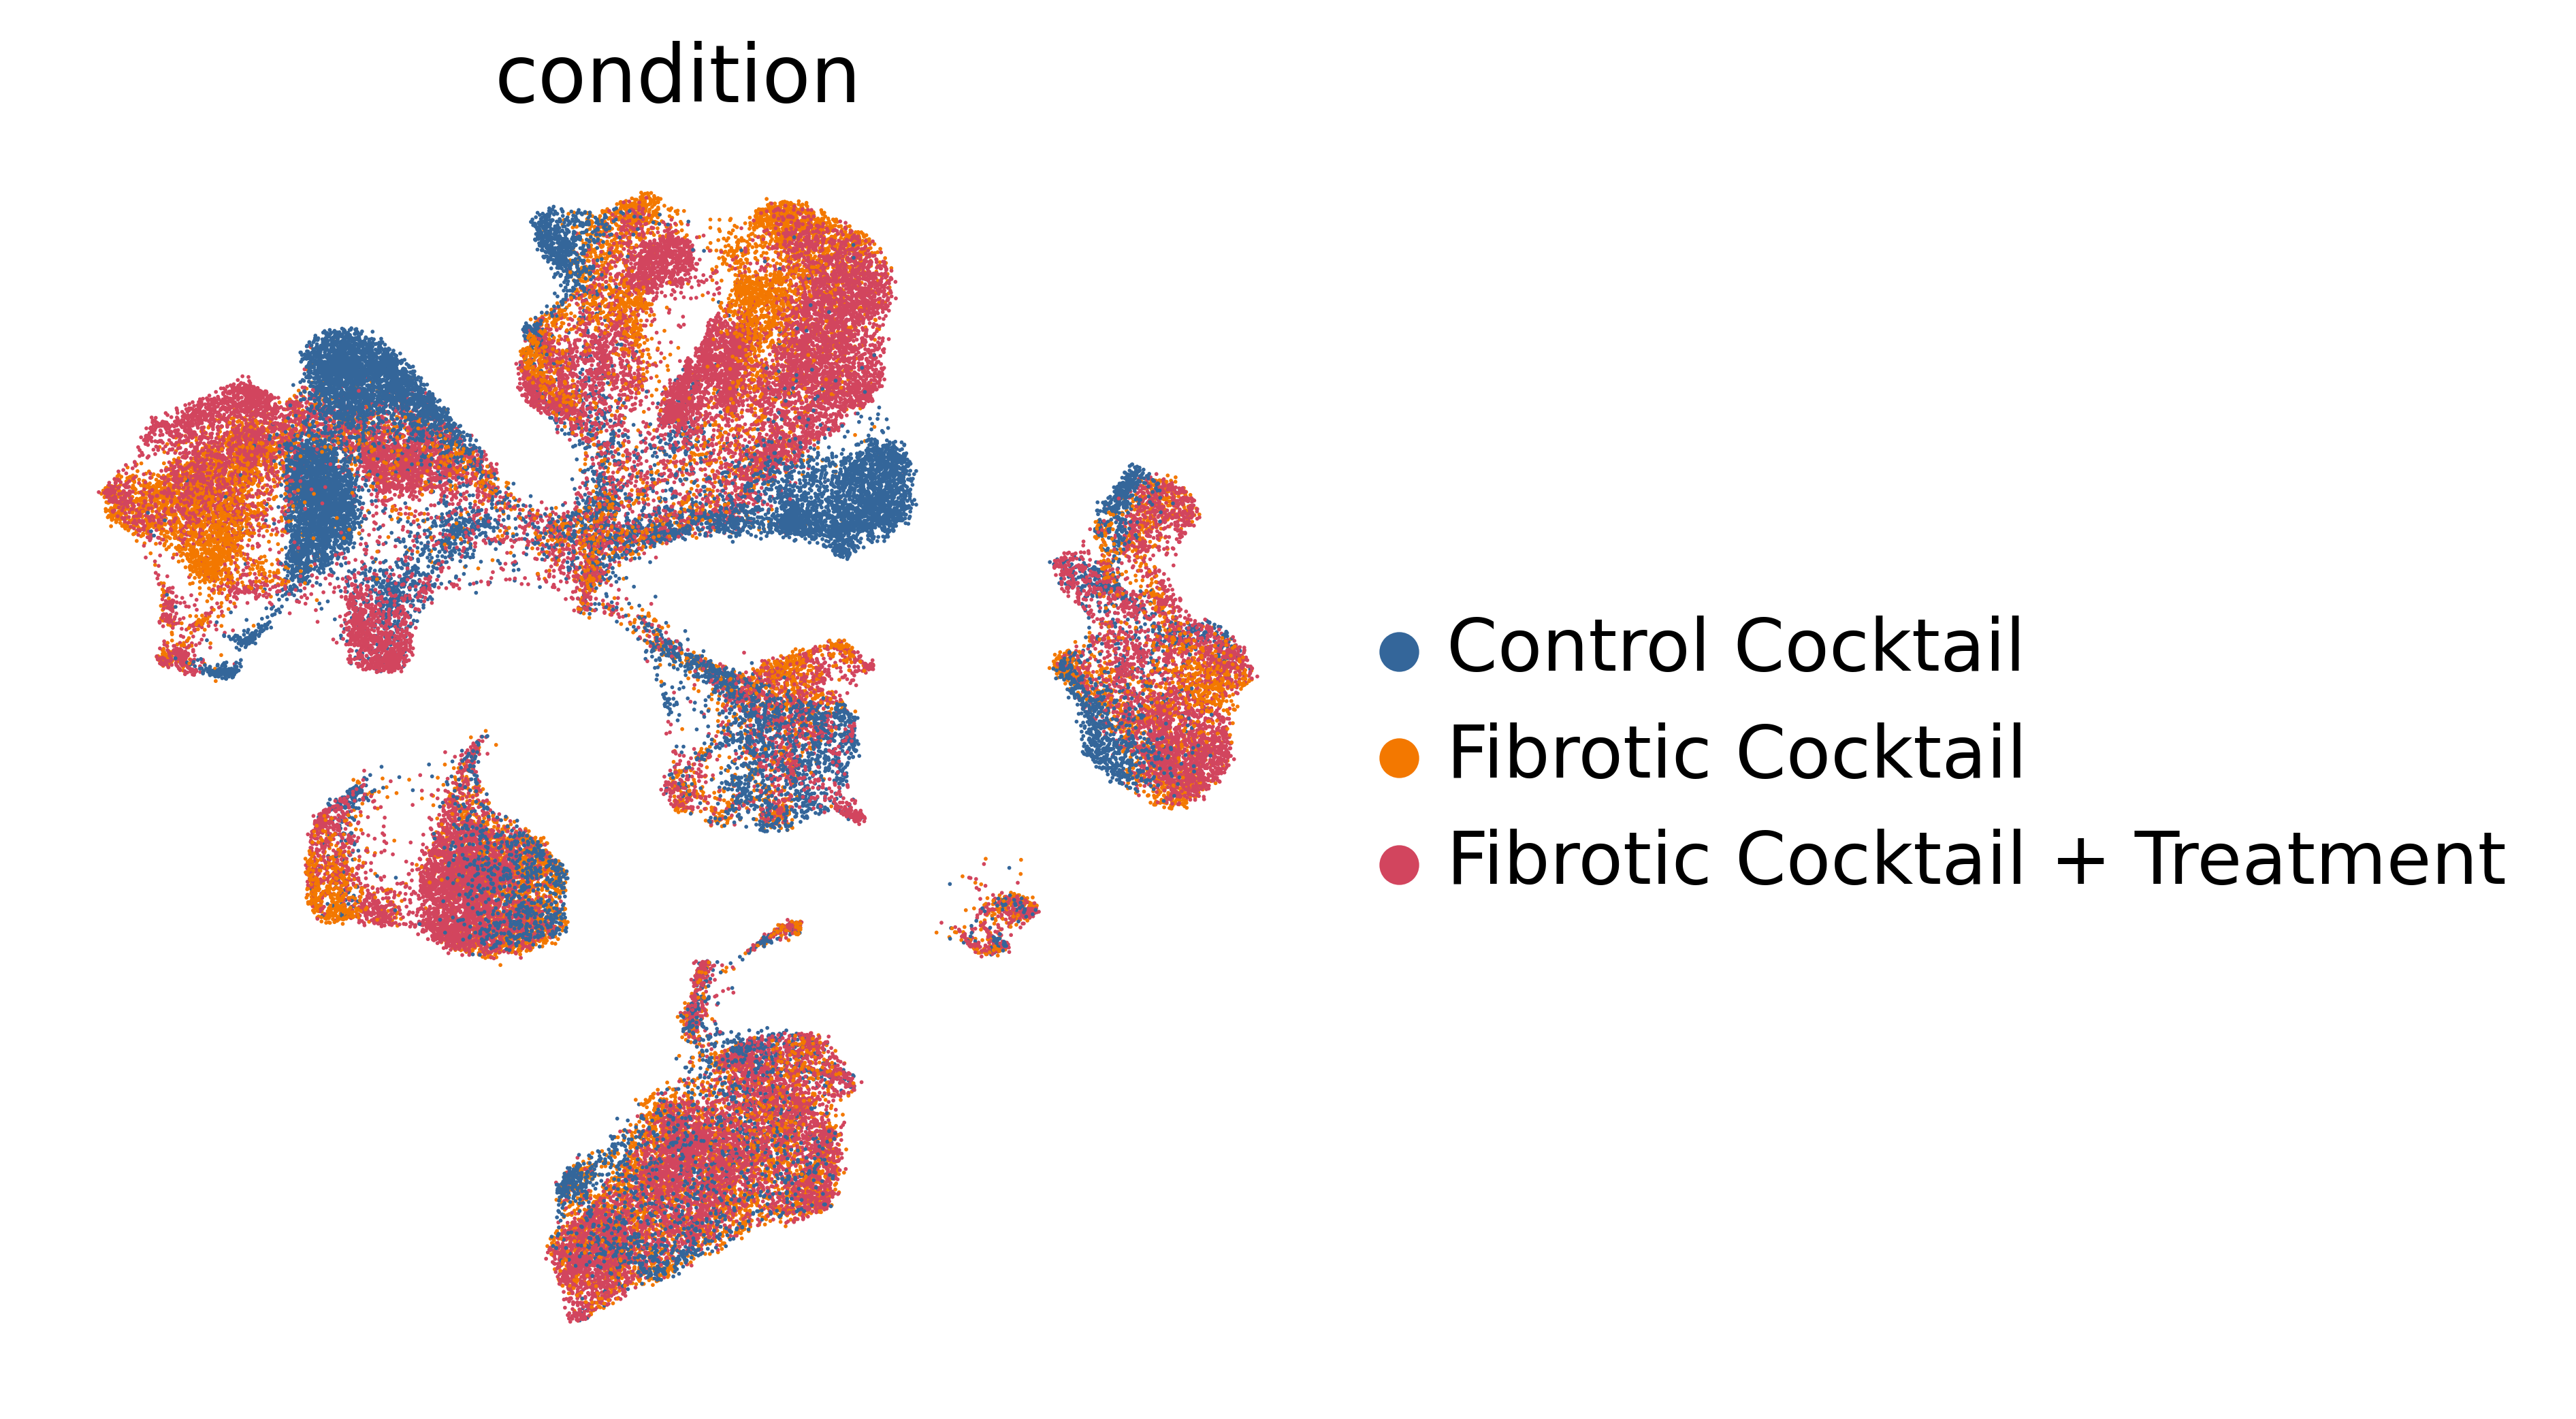

In [10]:
sc.pl.umap(
    adata,
    color="condition",
    palette={
        "Control Cocktail": common_config.pt_blue,
        "Fibrotic Cocktail": common_config.pt_orange,
        "Fibrotic Cocktail + Treatment": common_config.pt_red,
    },
    show=False,
)
plt.savefig("figures/condition_umap.png", bbox_inches="tight")

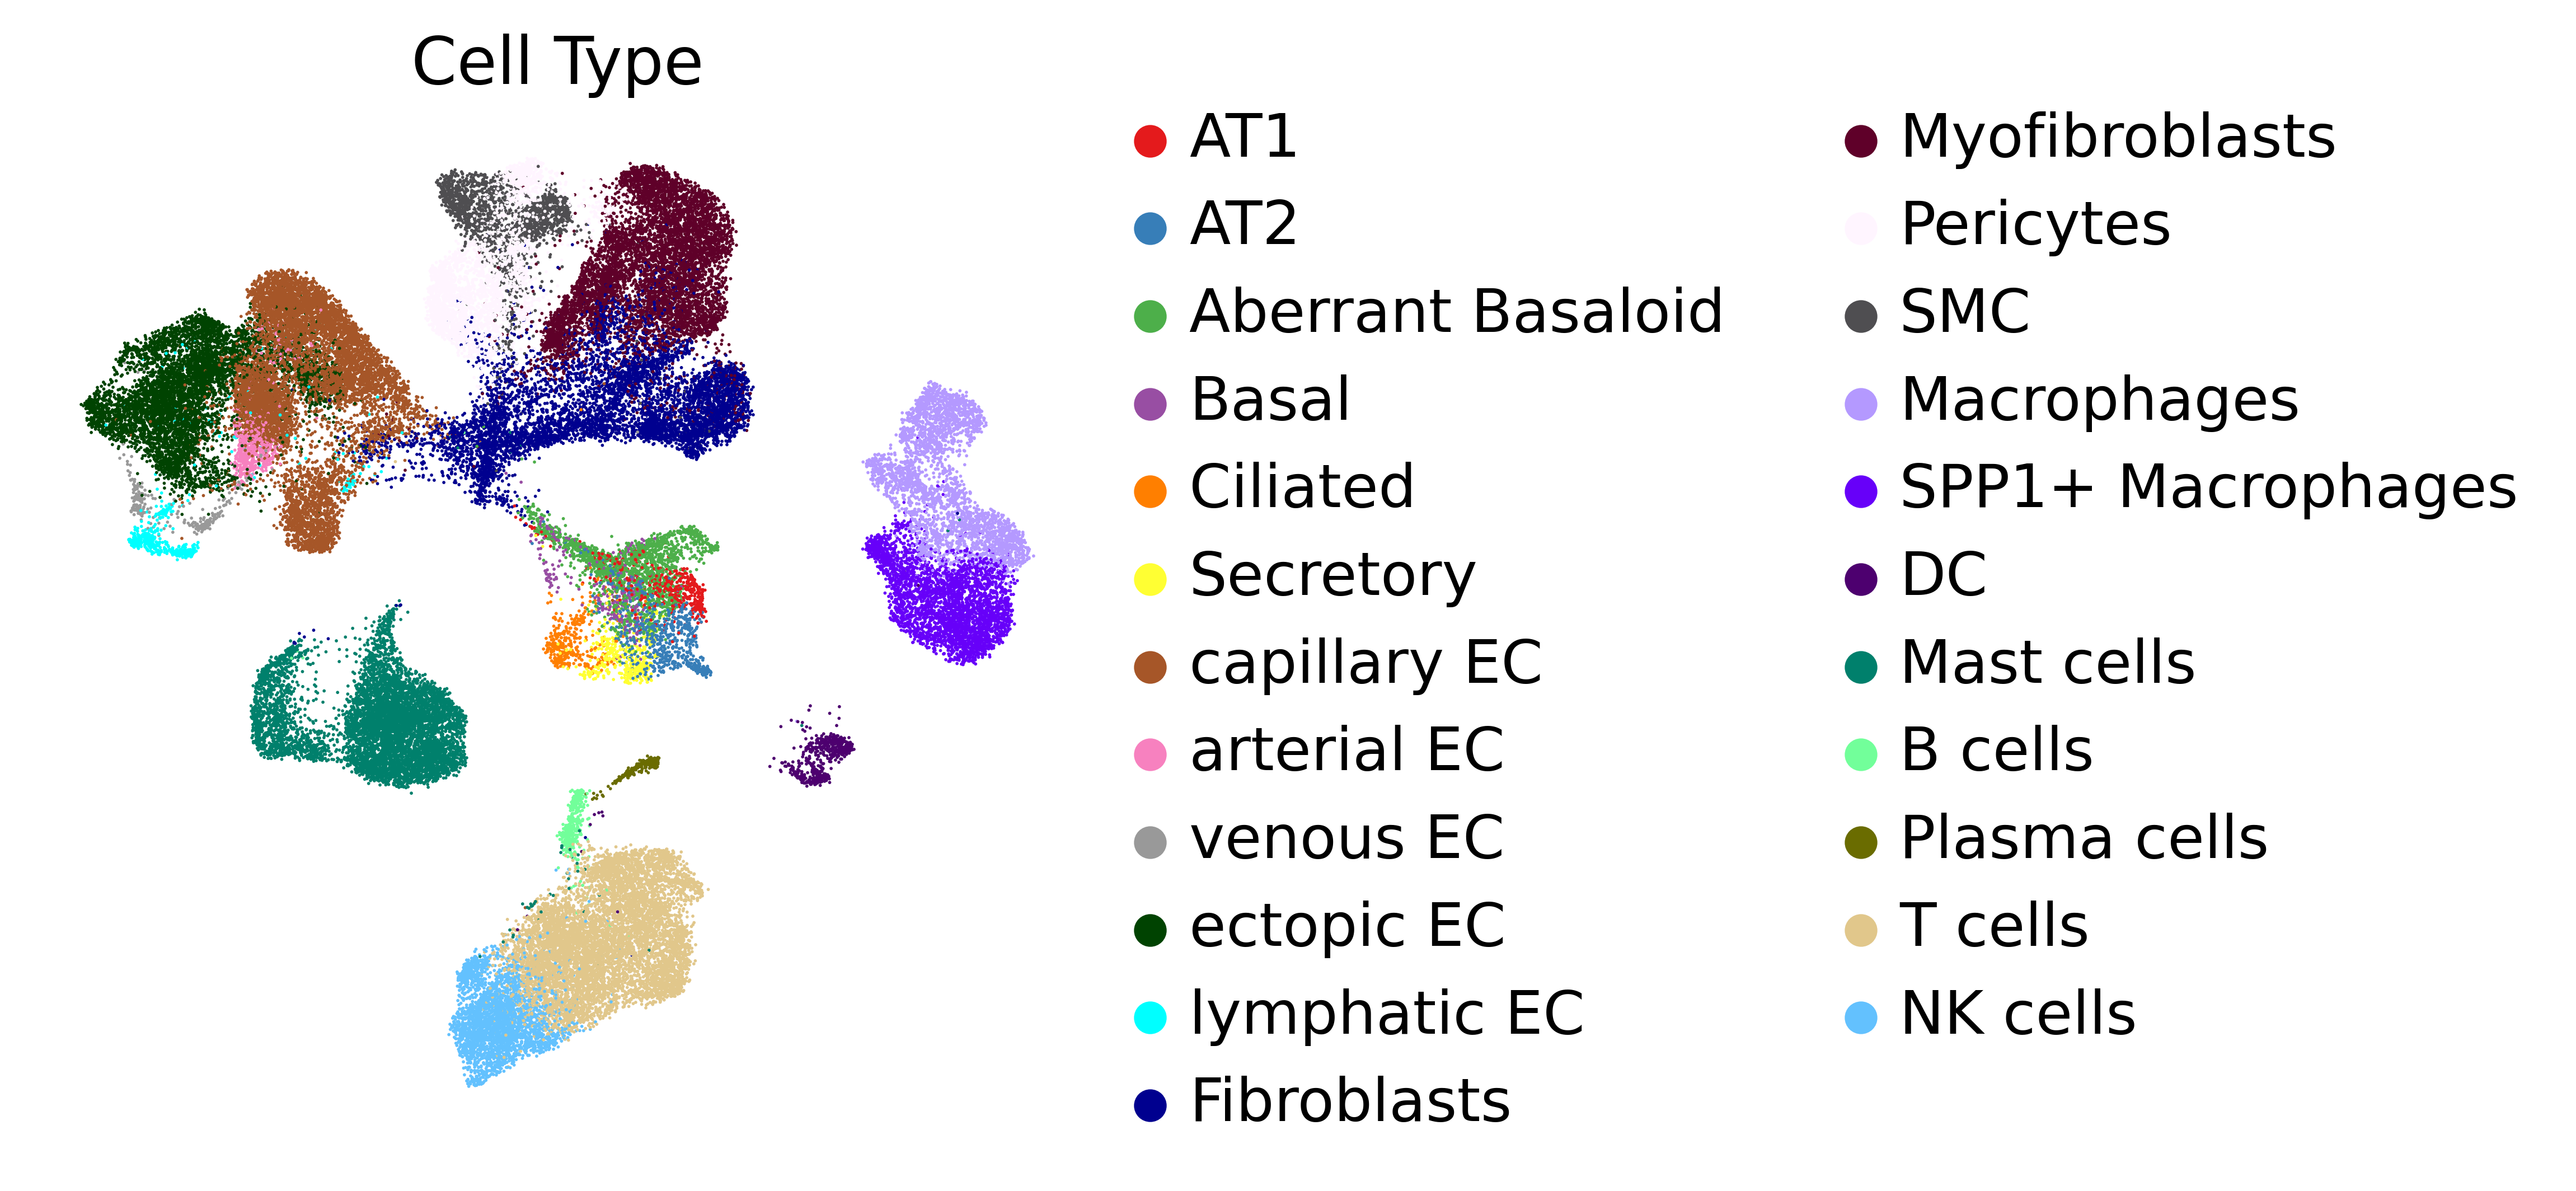

In [11]:
sc.pl.umap(adata, color="cell_type", show=False, title="Cell Type")
plt.savefig("figures/cell_type_umap.png", bbox_inches="tight")

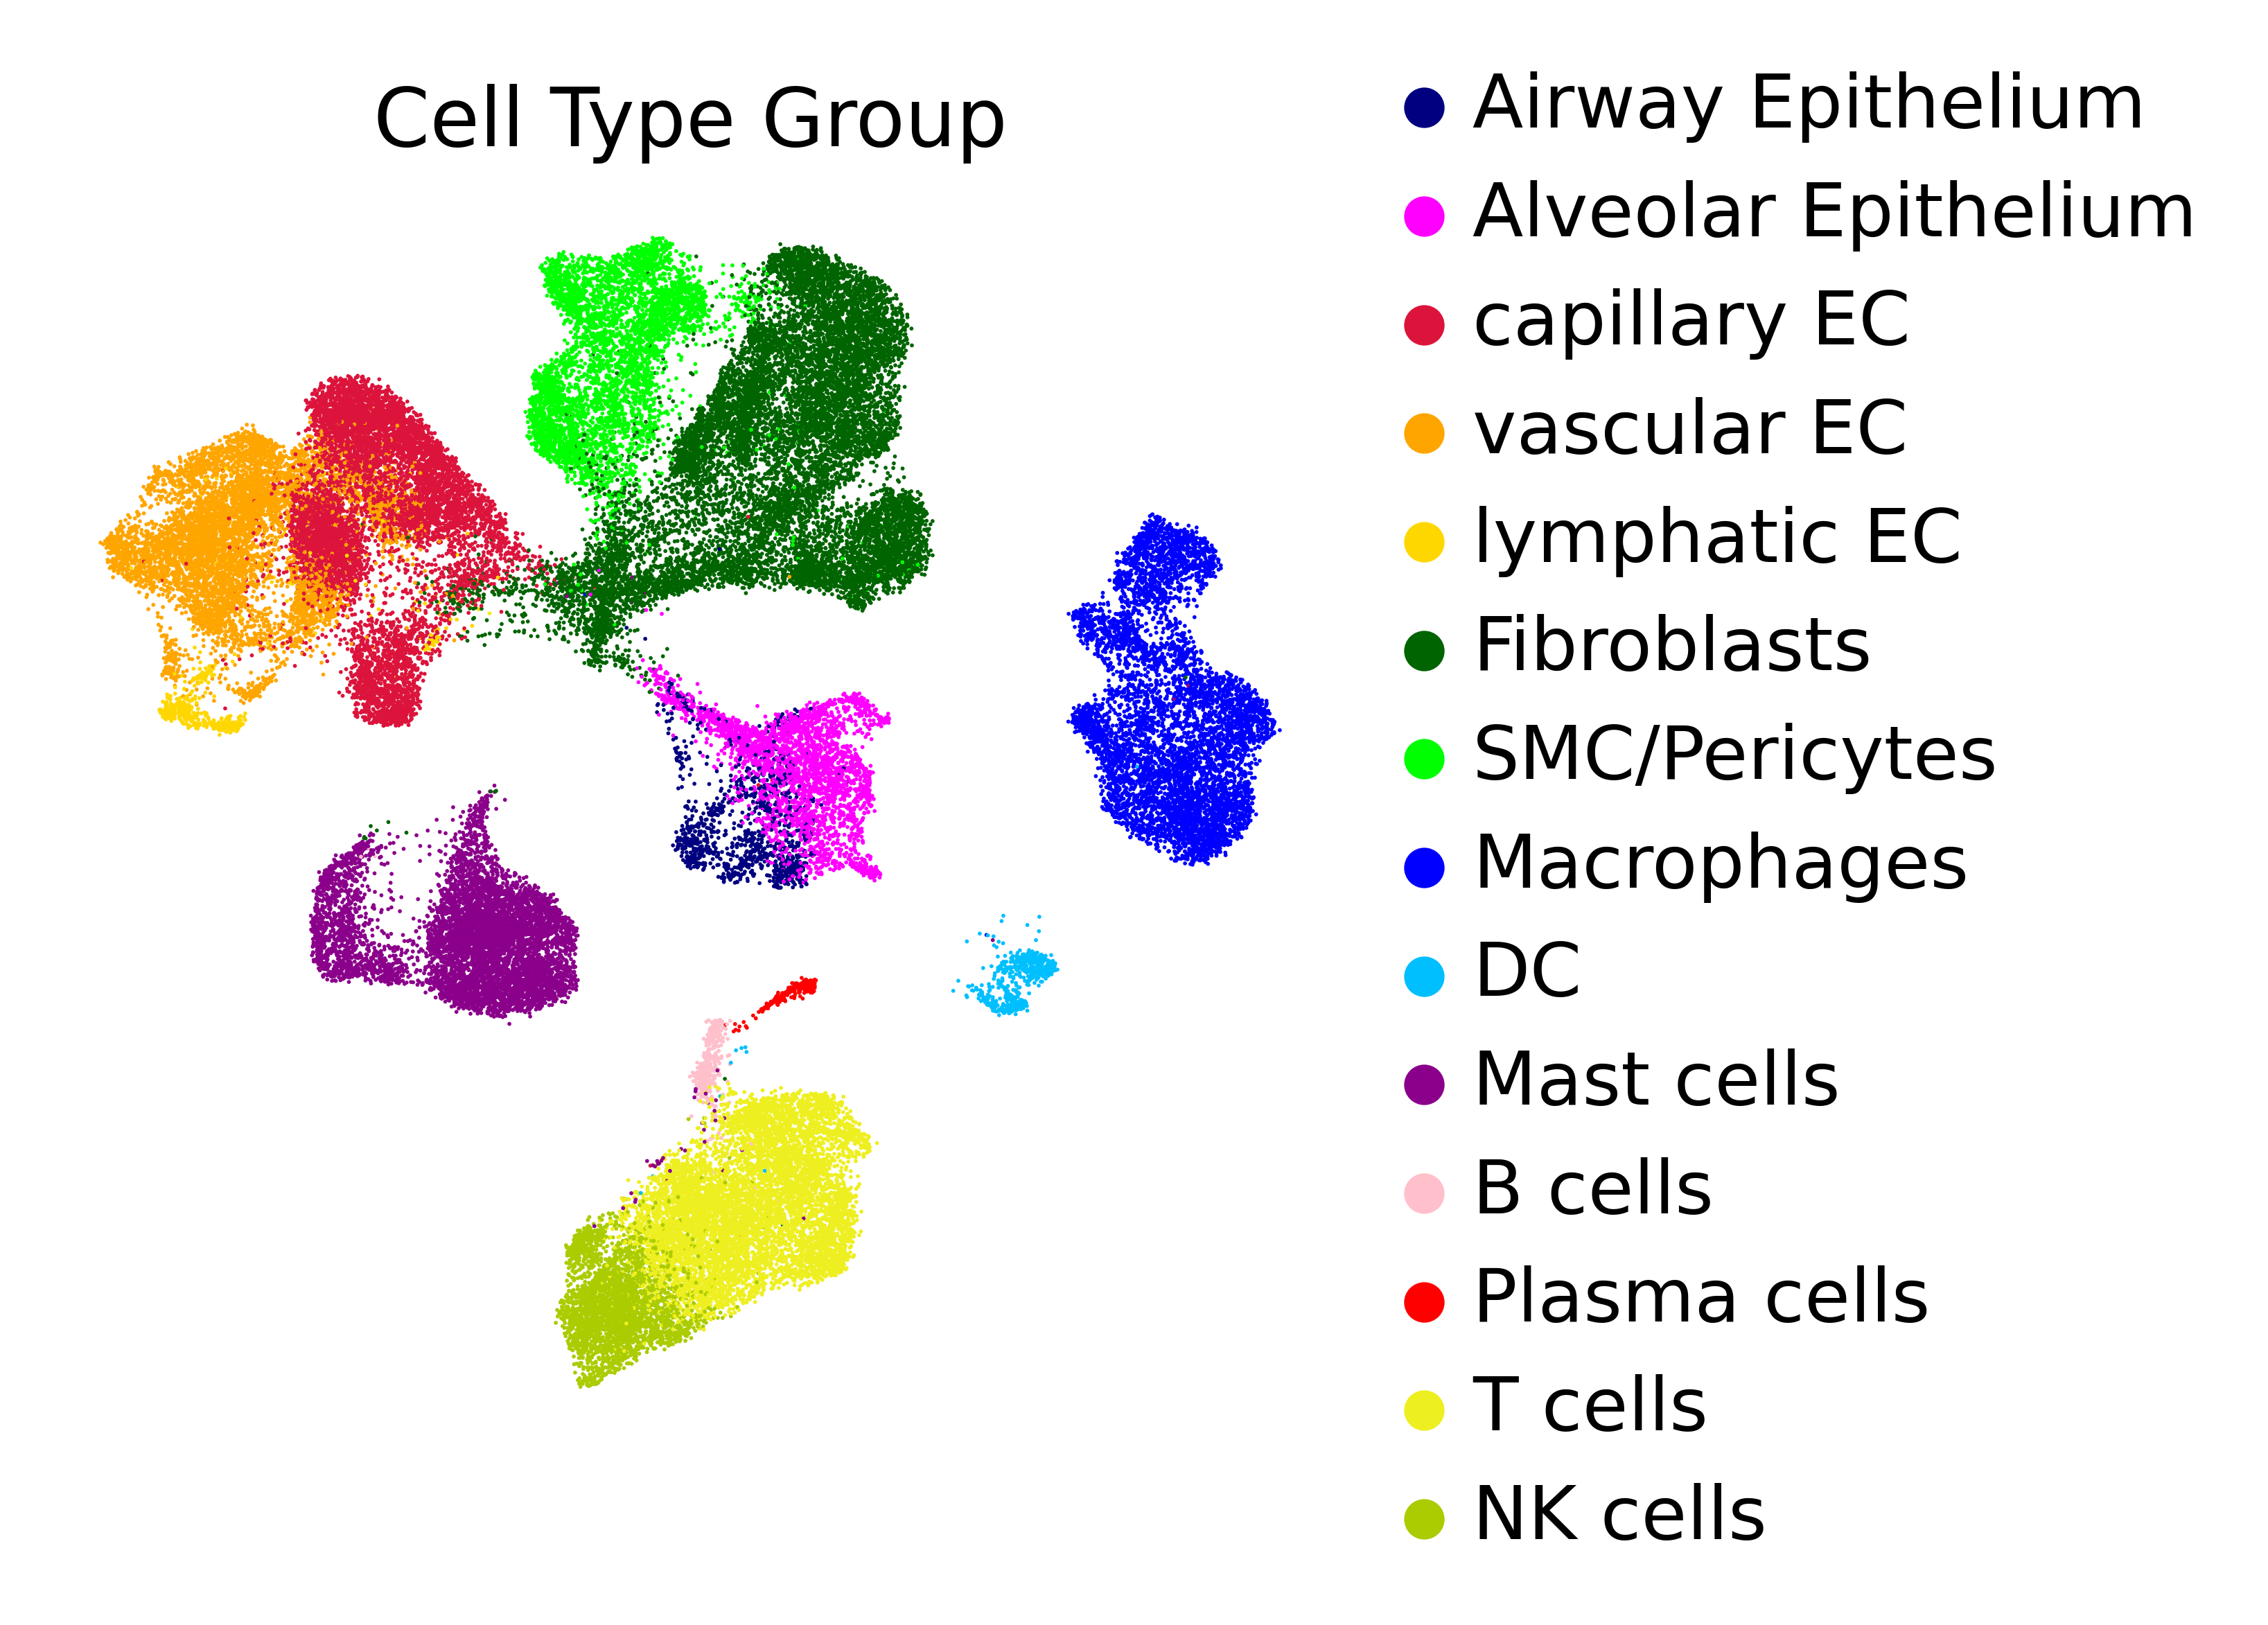

In [12]:
sc.pl.umap(adata, color="cell_type_group", show=False, title="Cell Type Group")
plt.savefig("figures/cell_type_group_umap.png", bbox_inches="tight")